In [5]:
import numpy as np
def step_function(x):
    if x > 0:
        return 1
    else :
        return 0

# step_function(-10)
step_function(np.array[10, -10])

TypeError: 'builtin_function_or_method' object is not subscriptable

In [17]:
import numpy as np
def step_function(x):
    y = x > 0
    return y.astype(np.int)

# step_function(-10)
step_function(np.array([10, -10]))

array([1, 0])

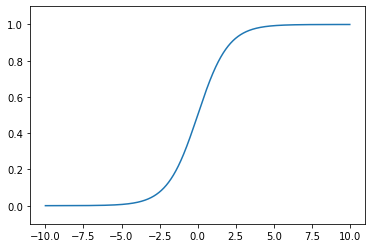

In [19]:
import numpy as np
import matplotlib.pylab as plt


def sigmoid(x):
    return 1 / (1 + np.exp(-x))    

X = np.arange(-10.0, 10.0, 0.01)
Y = sigmoid(X)
plt.plot(X, Y)
plt.ylim(-0.1, 1.1)
plt.show()

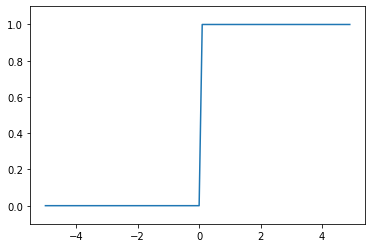

In [20]:
import numpy as np
import matplotlib.pylab as plt


def step_function(x):
    return np.array(x > 0, dtype=np.int)

X = np.arange(-5.0, 5.0, 0.1)
Y = step_function(X)
plt.plot(X, Y)
plt.ylim(-0.1, 1.1)  # y축의 범위 지정
plt.show()

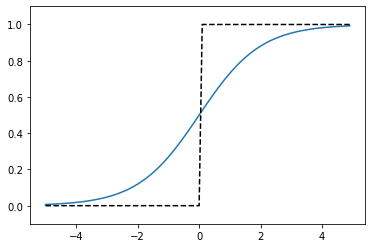

In [21]:
import numpy as np
import matplotlib.pylab as plt


def sigmoid(x):
    return 1 / (1 + np.exp(-x))    


def step_function(x):
    return np.array(x > 0, dtype=np.int)

x = np.arange(-5.0, 5.0, 0.1)
y1 = sigmoid(x)
y2 = step_function(x)

plt.plot(x, y1)
plt.plot(x, y2, 'k--')
plt.ylim(-0.1, 1.1) # y축 범위 지정
plt.show()

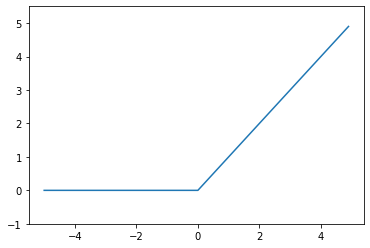

In [22]:
import numpy as np
import matplotlib.pylab as plt


def relu(x):
    return np.maximum(0, x)

x = np.arange(-5.0, 5.0, 0.1)
y = relu(x)
plt.plot(x, y)
plt.ylim(-1.0, 5.5)
plt.show()

In [28]:
A = np.array([[1,2], [3,4], [5,6]])
B = np.array([7,8])

C = np.dot(A,B)
C.shape
print(C)

[23 53 83]


In [29]:
A = np.array([[1,2], [3,4], [5,6]])
B = np.array([7,8,9])

C = np.dot(B,A)
C.shape
print(C)

[ 76 100]


In [30]:
X = np.array([1,2])
W = np.array([[1,3,5], [2,4,6]])

Y = np.dot(X,W)
print(Y)

[ 5 11 17]


### 1층 연산

In [33]:
X  = np.array([1.0, 0.5])
W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
B1 = np.array([0.1, 0.2, 0.3])
print(X.shape)
print(W1.shape)
print(B1.shape)

A1 = np.dot(X, W1) + B1
print(A1.shape)

(2,)
(2, 3)
(3,)
(3,)
[0.3 0.7 1.1]


### 1층의 활성화 함수

In [34]:
Z1 = sigmoid(A1)
print(A1)
print(Z1)

[0.3 0.7 1.1]
[0.57444252 0.66818777 0.75026011]


### 2층 연산

In [35]:
W2 = np.array([[0.1, 0.4], [0.2, 0.2], [0.3, 0.6]])
B2 = np.array([0.1, 0.2])
print(Z1.shape)
print(W2.shape)
print(B2.shape)

A2 = np.dot(Z1, W2) + B2
Z2 = sigmoid(A2)
print(A2.shape)

(3,)
(3, 2)
(2,)
(2,)


### 출력층 연산

In [36]:
def indentity_function(x):
    return x

W3 = np.array([[0.1, 0.3], [0.2, 0.4]])
B3 = np.array([0.1, 0.2])
print(Z2.shape)
print(W3.shape)
print(B3.shape)

A3 = np.dot(Z2, W3) + B3
Y = indentity_function(A3)
print(Y.shape)
print(Y)

(2,)
(2, 2)
(2,)
(2,)
[0.30936861 0.68136215]


### 구현 정리 

In [39]:
def  init_network():
    network = {}
    network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
    network['B1'] = np.array([0.1, 0.2, 0.3])
    network['W2'] = np.array([[0.1, 0.4], [0.2, 0.2], [0.3, 0.6]])
    network['B2'] = np.array([0.1, 0.2])
    network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
    network['B3'] = np.array([0.1, 0.2])
    return network

def  forward( network, x ):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['B1'], network['B2'], network['B3']
    
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)  
    a3 = np.dot(z2, W3) + b3
    y = indentity_function(a3)
    return y

network = init_network()
x = np.array([1.0, 0.5])
y = forward( network, x)
print(y)

[0.30936861 0.68136215]


### 소프트 맥스

In [6]:
import numpy as np
a = np.array([0.3, 2.9, 4.0])
exp_a = np.exp(a)
print(exp_a)

sum_exp_a = np.sum(exp_a)
print(sum_exp_a)

y = exp_a / sum_exp_a
print(y)

[ 1.34985881 18.17414537 54.59815003]
74.1221542101633
[0.01821127 0.24519181 0.73659691]


In [7]:
def softmax(a):
    exp_a = np.exp(a)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    return y

### softmax 구현시 지수의 오버플로우 문제

In [8]:
a = np.array([1010, 1000, 990])
y = softmax(a)
print(y)

[nan nan nan]


<ipython-input-7-37433be62e67>:2: RuntimeWarning: overflow encountered in exp
  exp_a = np.exp(a)
<ipython-input-7-37433be62e67>:4: RuntimeWarning: invalid value encountered in true_divide
  y = exp_a / sum_exp_a


In [11]:
c = np.max(a)
print(a-c)

y = softmax(a-c)
print(y)

[  0 -10 -20]
[9.99954600e-01 4.53978686e-05 2.06106005e-09]


In [12]:
a = np.array([10, 8, 6])
y = softmax(a)
print(y)

c = np.max(a)
print(a-c)

y = softmax(a-c)
print(y)

[0.86681333 0.11731043 0.01587624]
[ 0 -2 -4]
[0.86681333 0.11731043 0.01587624]


### 오버플로우 문제를 해결한 softmax()

In [13]:
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a-c)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    return y

In [15]:
a = np.array([0.3, 2.9, 4.0])
y = softmax(a)
print(y)
print(np.sum(y))

[0.01821127 0.24519181 0.73659691]
1.0


### MNIST 데이터셋

In [23]:
import sys, os
sys.path.append(os.pardir)
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)

print(x_train.shape)
print(t_train.shape)
print(x_test.shape)
print(t_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


5
(784,)
(28, 28)


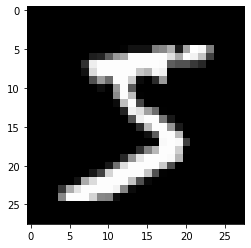

In [29]:
import matplotlib.pylab as plt
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
from dataset.mnist import load_mnist
from PIL import Image


def img_show(img):
    pil_img = Image.fromarray(np.uint8(img))
    pil_img.show()

(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)

img = x_train[0]
label = t_train[0]
print(label)  # 5

print(img.shape)  # (784,)
img = img.reshape(28, 28)  # 형상을 원래 이미지의 크기로 변형
print(img.shape)  # (28, 28)

plt.imshow(img, cmap='gray')
img_show(img)

### 파이썬 피클 사용법

In [35]:
import pickle

my_list = ['a', 'b', 'c']

with open("data.pkl", 'wb') as fw:
    pickle.dump(my_list, fw)
    
my_list = None
print(my_list)

with open("data.pkl", 'rb') as fr:
    my_list = pickle.load(fr)
print(type(my_list))
print(my_list)

None
<class 'list'>
['a', 'b', 'c']


### 신경망의 추론 처리

In [36]:
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import pickle
from dataset.mnist import load_mnist
from common.functions import sigmoid, softmax

def get_data():
    (x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, flatten=True, one_hot_label=False)
    return x_test, t_test

def init_network():
    with open("sample_weight.pkl", 'rb') as f:
        network = pickle.load(f)
    return network


def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)

    return y


x, t = get_data()
network = init_network()
accuracy_cnt = 0
for i in range(len(x)):
    y = predict(network, x[i])
    p= np.argmax(y) # 확률이 가장 높은 원소의 인덱스를 얻는다.
    if p == t[i]:
        accuracy_cnt += 1

print("Accuracy:" + str(float(accuracy_cnt) / len(x)))

Accuracy:0.9352


### 배치 처리

In [40]:
x, _ = get_data()
network = init_network()
W1, W2, W3 = network['W1'], network['W2'], network['W3']
print(x.shape)
print(x[0].shape)
print(W1.shape)
print(W2.shape)
print(W3.shape)

(10000, 784)
(784,)
(784, 50)
(50, 100)
(100, 10)


In [8]:
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 
import numpy as np
import pickle
from dataset.mnist import load_mnist
from common.functions import sigmoid, softmax


def get_data():
    (x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, flatten=True, one_hot_label=False)
    return x_test, t_test


def init_network():
    with open("sample_weight.pkl", 'rb') as f:
        network = pickle.load(f)
    return network


def predict(network, x):
    w1, w2, w3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, w1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, w2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, w3) + b3
    y = softmax(a3)

    return y


x, t = get_data()
network = init_network()

batch_size = 100 # 배치 크기
accuracy_cnt = 0

for i in range(0, len(x), batch_size):
    x_batch = x[i:i+batch_size]
    y_batch = predict(network, x_batch)
    p = np.argmax(y_batch, axis=1)
    accuracy_cnt += np.sum(p == t[i:i+batch_size])

print("Accuracy:" + str(float(accuracy_cnt) / len(x)))

Accuracy:0.9352


In [41]:
list( range(0, 10 ))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [42]:
list( range(0, 10, 3 ))

[0, 3, 6, 9]

In [44]:
x = np.array([[0.1, 0.8, 0.2],[0.9, 0.8, 0.2],[0.1, 0.8, 1.0],[1.1, 0.8, 0.2]])
y = np.argmax(x, axis=1)
print(y)

[1 0 2 0]


In [47]:
y = np.array([1, 2, 1, 0])
t = np.array([1, 2, 0, 0])
print(y==t)
np.sum(y==t)
np.mean(y==t)

[ True  True False  True]


0.75